In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline  
matplotlib.rcParams['figure.figsize'] = (15,10)

#### EXERCICIO 1

In [159]:
a = np.array([[1,0,0,0],[1,1,1,1],[1,2,4,8],[1,3,9,27]])
b = np.array([1,0,-1,2])
solucao = np.linalg.solve(a,b)

In [187]:
solucao

array([ 1.        ,  0.33333333, -2.        ,  0.66666667])

#### EXERCICIO 6

In [138]:
n = 3
a, b, x = np.tril(np.random.rand(n, n)), np.random.rand(n), np.zeros(3)
for i in range(n):
    soma = 0
    for j in range(i+1):
        if i == j:
            x[i] = (b[i] + soma) / a[i,j]
        soma += x[i] * a[i, j]

#### EXERCICIO  SETE

Podemos ver que a ordem do algorítmo usado é de ____ 

In [204]:
def calculate_time(which='solve'):
    medias, yerr = [], []
    start, finish, step = 10, 1000, 30
    for n in range(start, finish+step, step):

        a = np.random.rand(n, n)
        b = np.random.rand(n, 1)

        t_test = []
        for i in range(10):
            if which=='solve':
                t = time.time()
                np.linalg.solve(a,b)
                t_test.append(time.time() - t)
            elif which=='inv':
                t = time.time()
                np.multiply(np.linalg.inv(a), b)
                t_test.append(time.time() - t)
        medias.append(np.average(t_test))
        yerr.append(np.std(t_test))
        
    return medias, yerr

In [221]:
media_solve, yerr_solve = calculate_time()

In [220]:
media_inv, yerr_inv = calculate_time(which='inv')

In [222]:
def fit(x, medias):
    logx = np.log(x)
    logy = np.log(medias)
    coeffs = np.polyfit(logx,logy,deg=1)
    poly = np.poly1d(coeffs)
    yfit = lambda x: np.exp(poly(np.log(x)))
    return yfit, coeffs

Solve Method Complexity Estimation:  1.9722664957
Inverse Method Complexity Estimation:  2.13776157981
Third Power Projection Complexity Estimation:  3.0


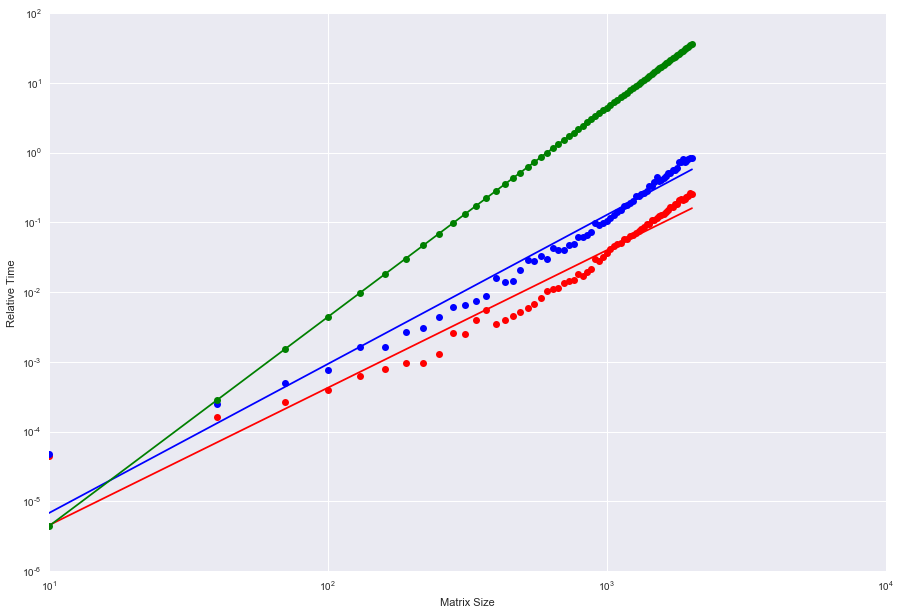

In [249]:
start, finish, step = 10, 2000, 30
x = [i for i in range(start, finish+step, 30)]


fit_final, coeffs = fit(x, media_solve)
plt.loglog(x, fit_final(x), color='r')
print('Solve Method Complexity Estimation: ', coeffs[0])

fit_final, coeffs = fit(x, media_inv)
plt.loglog(x, fit_final(x), color='b')
print('Inverse Method Complexity Estimation: ', coeffs[0])

terceira = [media_solve[0]/10000*np.power(i, 3) for i in range(start, finish+step, 30)]
fit_final, coeffs = fit(x, terceira)
plt.loglog(x, fit_final(x), color='g')
print('Third Power Projection Complexity Estimation: ', coeffs[0])

plt.loglog(x, media_solve, ls='None', marker='o', color='r')
plt.loglog(x, media_inv, ls='None', marker='o', color='b')
plt.loglog(x, terceira, ls='None', marker='o', color='g')
plt.xlabel('Matrix Size')
plt.ylabel('Relative Time')
plt.legend([])

In [216]:
start, finish, step = 10, 2000, 20
print(media_solve)

[8.4662437438964849e-05, 0.00030405521392822265, 0.0002875804901123047, 0.00043807029724121096, 0.00090079307556152339, 0.0011031627655029297, 0.0012914419174194336, 0.0014102935791015625, 0.0016873836517333984, 0.0021562099456787108, 0.0029855012893676759, 0.0023131847381591799, 0.0029540538787841799, 0.0034562826156616213, 0.0034685850143432615, 0.0045888185501098636, 0.0059662580490112303, 0.009273123741149903, 0.010453391075134277, 0.0097892284393310547, 0.0092462778091430657, 0.012316918373107911, 0.015815925598144532, 0.020485401153564453, 0.014880108833312988, 0.016007900238037109, 0.022060942649841309, 0.019620156288146971, 0.021802639961242674, 0.023902010917663575, 0.031770801544189452, 0.029308223724365236, 0.037886810302734372, 0.032023811340332033, 0.047873830795288085, 0.045091986656188965, 0.048515820503234865, 0.058362913131713864, 0.059017205238342287, 0.070363831520080564, 0.072558546066284174, 0.073420715332031247, 0.082390666007995605, 0.074814891815185552, 0.081928